In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
import torch.utils.data as utils
import torchvision.transforms as transforms
import pandas as pd
from scipy.stats import norm
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import MNIST
from torchvision.utils import make_grid as make_image_grid
import csv
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy import cluster
torch.manual_seed(2017) # reproducability
sns.set_style('dark')
%matplotlib inline

In [2]:
data = pd.read_csv("calls_blue2.csv")
user_munber_list = data.reset_index()[['0.7441', '491']].values.tolist()
del data['0.7441']
del data['491']
data_norm = data/data.values.max()
data_norm = data_norm.dropna(how='any')
data_list = data_norm.values.tolist()
print (len(data_list[0]))
print (len(data_list))

data_list2 = []
for ele in data_list:
    data_list2.append(ele[:4380])
    
print (len(data_list2[0]))
print (len(data_list2))


8760
2027
4380
2027


In [3]:
sums = [[]]
for i in range(len(data_list2)):
    sums.append([i, sum(data_list2[i])])
del sums[0]
sums[:5]
worst = sums

In [4]:
sums.sort(key=lambda x: x[1], reverse = True)

In [5]:
sums[:10]

[[1003, 240.7734375],
 [1286, 234.359375],
 [1659, 210.6015625],
 [1356, 171.625],
 [957, 166.4140625],
 [142, 143.5859375],
 [1386, 140.8359375],
 [1690, 137.828125],
 [968, 134.6875],
 [1477, 133.4921875]]

In [7]:
count1 = 0
count2 = 0
count3 = 0
for ele in sums:
    if ele[1] <=50:
        count1+=1
    elif 50<ele[1]<100:
        count2+=1
    else:
        count3+=1


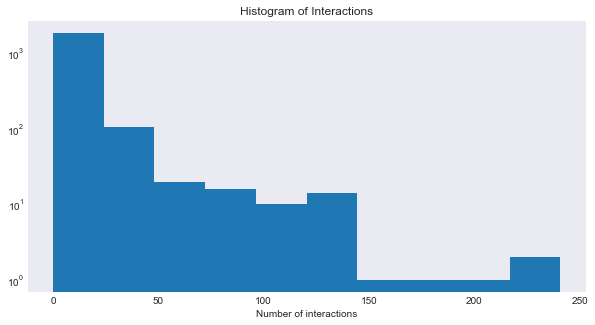

In [11]:
values = [item[1] for item in sums]
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(values, log=True)
plt.title('Histogram of Interactions')
plt.xlabel("Number of interactions")
plt.show()

In [24]:
print ('Number of dyads: ', len(data_list2))
print ('of which', count1 ,'have less than 50 value counts,', count2, 'have betweent 50 and 100, and', count3,'are greater than 100.')
print ('Percentage of less than 50:', count1/len(sums)*100)
print ('Percentage of less than 100:', count2/len(sums)*100)
print ('Rest:', count2/len(sums)*100)

Number of dyads:  2027
of which 1964 have less than 50 value counts, 35 have betweent 50 and 100, and 28 are greater than 100.
Percentage of less than 50: 96.89195855944746
Percentage of less than 100: 1.7266896891958559
Rest: 1.7266896891958559


In [27]:
import skimage
from skimage import data, io, filters

In [41]:
skimage.measure.compare_ssim(np.asarray(data_list2[sums[21][0]]), np.asarray(data_list2[sums[20][0]]))

0.5355841435445686

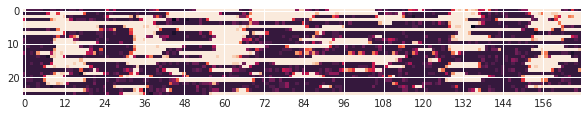

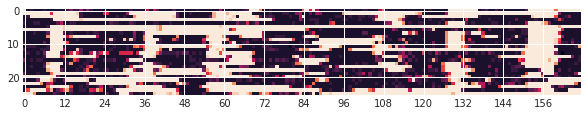

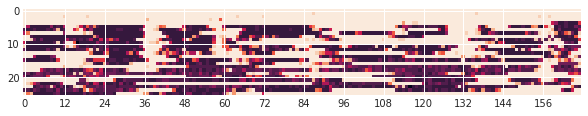

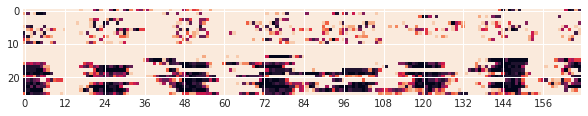

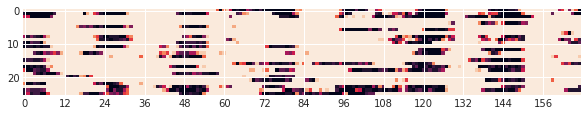

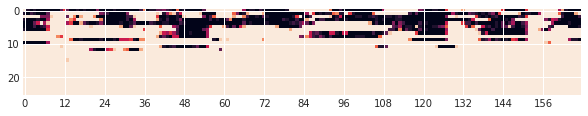

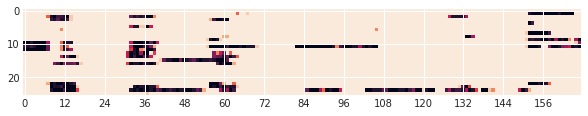

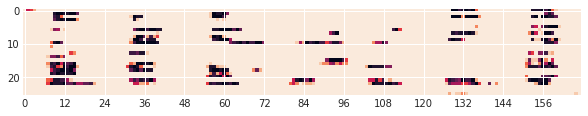

In [42]:
to_print = [sums[0][0], sums[1][0], sums[3][0], sums[40][0], sums[41][0], sums[42][0], sums[100][0], sums[101][0]]
for i in range (len(to_print)):
    plt.figure(figsize=(10, 10))
    plt.imshow( 1-np.array(data_list2[to_print[i]][:4368]).reshape(26, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("imgage_halfyear{i}.png".format(i=i))